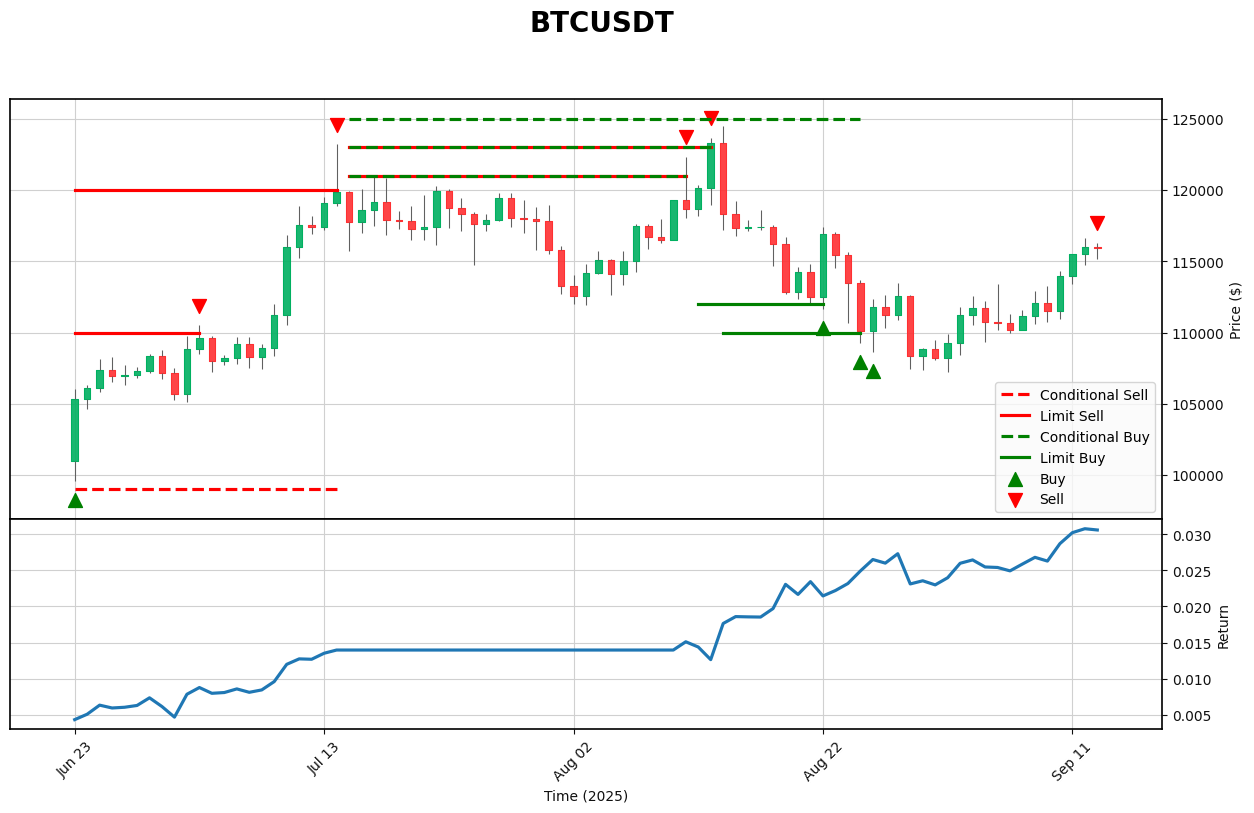

In [2]:
import pandas as pd
from Backtest import BacktestServer

category = 'linear'
symbol = 'BTCUSDT'
data = pd.read_csv(f'{symbol}_1d.csv', parse_dates=['time'])
server = BacktestServer({category: {symbol: data}}, {'USDT': 10000})

op = server.place_order(category, symbol, 'Buy', 'Market', 0.01)
sl = server.place_order(category, symbol, 'Sell', 'Market', 0.01, triggerDirection=2, triggerPrice=99000, reduceOnly=True)
tp1 = server.place_order(category, symbol, 'Sell', 'Limit', 0.005, price=110000, reduceOnly=True)
tp2 = server.place_order(category, symbol, 'Sell', 'Limit', 0.005, price=120000, reduceOnly=True)
while server.next():
      sl_order = server.get_open_orders(category, symbol, orderId=sl['orderId'])[0]
      tp_order = server.get_open_orders(category, symbol, orderId=tp2['orderId'])[0]
      if sl_order['orderStatus'] == 'Filled':
            server.cancel_order(category, symbol, orderId=tp2['orderId'])
            break
      if tp_order['orderStatus'] == 'Filled':
            server.cancel_order(category, symbol, orderId=sl['orderId'])
            break
        
op1 = server.place_order(category, symbol, 'Sell', 'Limit', 0.005, 121000)
op2 = server.place_order(category, symbol, 'Sell', 'Limit', 0.005, 123000)
sl = server.place_order(category, symbol, 'Buy', 'Market', 0.01, triggerDirection=1, triggerPrice=125000, reduceOnly=True)
tp1 = server.place_order(category, symbol, 'Buy', 'Limit', 0.005, 112000, triggerDirection=1, triggerPrice=121000, reduceOnly=True)
tp2 = server.place_order(category, symbol, 'Buy', 'Limit', 0.005, 110000, triggerDirection=1, triggerPrice=123000, reduceOnly=True)
while server.next():
      sl_order = server.get_open_orders(category, symbol, orderId=sl['orderId'])[0]
      tp1_order = server.get_open_orders(category, symbol, orderId=tp1['orderId'])[0]
      tp2_order = server.get_open_orders(category, symbol, orderId=tp2['orderId'])[0]
      if sl_order['orderStatus'] == 'Filled':
            server.cancel_order(category, symbol, orderId=tp1['orderId'])
            server.cancel_order(category, symbol, orderId=tp2['orderId'])
            break
      if tp1_order['orderStatus'] == 'Filled' and tp2_order['orderStatus'] == 'Filled':
            server.cancel_order(category, symbol, orderId=sl['orderId'])
            break
        
server.place_order(category, symbol, 'Buy', 'Market', 0.01)
server.run_to_end()
server.show_klines()